In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds 

2023-11-10 19:09:04.644831: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 19:09:05.096700: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 19:09:05.098655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 19:09:06.700484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Crear dataset para regresión

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)

X.shape , y.shape


((200, 10), (200,))

Visualización

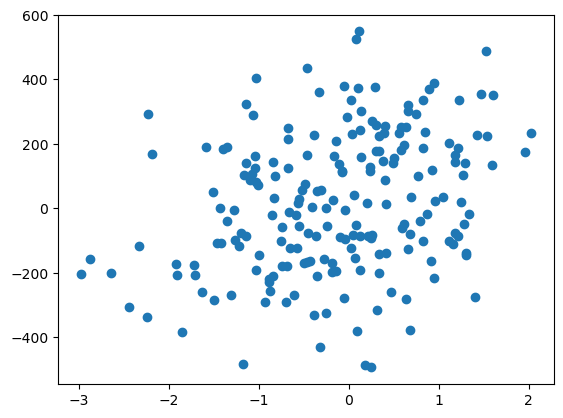

In [10]:

# grafico con la primer cols de caracts. e y
plt.scatter(X[:,0],y)

In [8]:
X[:,0].shape

(200,)

In [40]:
print(type(y))

<class 'numpy.ndarray'>


In [50]:
# separro train/test


from sklearn.model_selection import train_test_split


# Set the random seed 
tf.random.set_seed(42)


X_train,X_test,y_train,y_test = train_test_split(X,aux,test_size=.2)


In [53]:
# MODELO

In [57]:


# 2 capas ocultas

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation="relu", name="layer1"),
        tf.keras.layers.Dense(10, activation="relu", name="layer2"),
        tf.keras.layers.Dense(1, name="output"),
    ]
)


model.compile(loss='mse',
             optimizer=tf.keras.optimizers.SGD(),
             metrics='mae')



model.fit(X_train,y_train,epochs=5)



Epoch 1/5
5/5 [==============================] - 1s 2ms/step - loss: 414317627981168640.0000 - mae: 92032816.0000
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 78252232146944.0000 - mae: 8842422.0000
Epoch 3/5
5/5 [==============================] - 0s 2ms/step - loss: 63937760460800.0000 - mae: 7992848.0000
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: 52241801150464.0000 - mae: 7224902.5000
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 42685356310528.0000 - mae: 6530738.5000


In [58]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 37749990096896.0000 - mae: 6144102.5000


[37749990096896.0, 6144102.5]

In [61]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [62]:
y_pred


array([[6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5],
       [6144172.5]], dtype=float32)

In [63]:
# new model, more epochs and Adam

In [94]:
# Build the model 
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
]) 

# Compile the model
model2.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , 
              metrics = ['mae'])

# Fit the model 
history = model2.fit(X_train , y_train , epochs= 100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 178.4535 - mae: 178.4535
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 178.3543 - mae: 178.3543
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 178.2509 - mae: 178.2509
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 178.1532 - mae: 178.1532
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 178.0634 - mae: 178.0634
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 177.9622 - mae: 177.9622
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 177.8669 - mae: 177.8669
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 177.7587 - mae: 177.7587
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 177.6442 - mae: 177.6442
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 177.5171 - mae: 177.5171
Epoch 11/100
5/5 [=====================

5/5 [==============================] - 0s 3ms/step - loss: 0.1600 - mae: 0.1600
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1741 - mae: 0.1741
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2008 - mae: 0.2008
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1828 - mae: 0.1828
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1794 - mae: 0.1794
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2056 - mae: 0.2056
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2496 - mae: 0.2496
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1932 - mae: 0.1932
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1391 - mae: 0.1391
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1957 - mae: 0.1957
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2918 - ma

In [103]:
model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 10.1641 - mae: 10.1641


[10.164102554321289, 10.164102554321289]

In [95]:
type(history.history)

dict

Text(0.5, 0, 'Epochs')

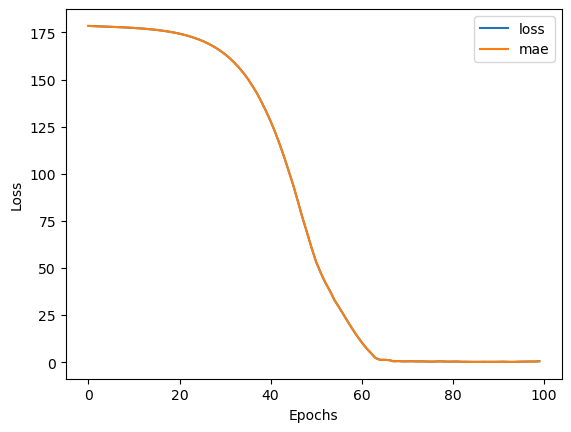

In [96]:
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [105]:
# mejor: normalizo los datos!!!



""" Standard Scaler"""
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)



"""Min Max Scaler"""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)







In [106]:
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
]) 

# Compile the model
model3.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , 
              metrics = ['mae'])

# Fit the model 
history2 = model2.fit(X_train_normalized , y_train , epochs= 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 325.9580 - mae: 325.9580
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 311.9395 - mae: 311.9395
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 291.2227 - mae: 291.2227
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 270.6039 - mae: 270.6039
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 251.8145 - mae: 251.8145
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 237.0204 - mae: 237.0204
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 223.7730 - mae: 223.7730
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 214.7284 - mae: 214.7284
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 208.0573 - mae: 208.0573
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 202.6523 - mae: 202.6523
Epoch 11/100
5/5 [=====================

5/5 [==============================] - 0s 2ms/step - loss: 175.8769 - mae: 175.8769
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 175.8271 - mae: 175.8271
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 175.7809 - mae: 175.7809
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 175.7452 - mae: 175.7452
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 175.7078 - mae: 175.7078
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 175.6804 - mae: 175.6804
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 175.6169 - mae: 175.6169
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 175.5997 - mae: 175.5997
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 175.5424 - mae: 175.5424
Epoch 94/100
5/5 [==============================] - 0s 3ms/step - loss: 175.5192 - mae: 175.5192
Epoch 95/100
5/5 [=========================

In [107]:
# Aplica el mismo scaler que se utilizó en el entrenamiento
X_test_normalized = scaler.transform(X_test)

In [108]:
model3.evaluate(X_test_normalized,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 190.1163 - mae: 190.1163


[190.1162567138672, 190.1162567138672]